# The Lahman Baseball Database

This database contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2013.  It includes data from the two current leagues (American and National), the four other "major" leagues (American Association, Union Association, Players League, and Federal League), and the National Association of 1871-1875

In [65]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# Get the Data

In [66]:
batting = pd.read_csv('E:\\Acads\\AdvPython\\Capstone\\MoneyBall\\MoneyBall Batting.csv')

* playerID       Player ID code
* yearID         Year
* stint          player's stint (order of appearances within a season)
* teamID         Team
* lgID           League
* G              Games
* G_batting      Game as batter
* AB             At Bats
* R              Runs
* H              Hits
* 2B             Doubles
* 3B             Triples
* HR             Homeruns
* RBI            Runs Batted In
* SB             Stolen Bases
* CS             Caught Stealing
* BB             Base on Balls
* SO             Strikeouts
* IBB            Intentional walks
* HBP            Hit by pitch
* SH             Sacrifice hits
* SF             Sacrifice flies
* GIDP           Grounded into double plays
* G_Old          Old version of games (deprecated)

In [67]:
sal = pd.read_csv('E:\\Acads\\AdvPython\\Capstone\\MoneyBall\\MoneyBall Salaries.csv')

* yearID         Year
* teamID         Team
* lgID           League
* playerID       Player ID code
* salary         Salary

# Feature Engineering

We need to add three more statistics that were used in Moneyball:
* Batting Average
* On Base Percentage
* Slugging Percentage

In [68]:
batting['BA']  = batting['H'] / batting['AB']
batting['OBP'] = (batting['H'] + batting['BB'] + batting['HBP'])/(batting['AB'] + batting['BB'] + batting['HBP'] + batting['SF'])
batting['1B'] = batting['H'] - batting['2B'] - batting['3B'] - batting['HR']
batting['SLG'] = ((1 * batting['1B']) + (2 * batting['2B']) + (3 * batting['3B']) + (4 * batting['HR'])) / batting['AB']

In [69]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97889 entries, 0 to 97888
Data columns (total 28 columns):
playerID     97889 non-null object
yearID       97889 non-null int64
stint        97889 non-null int64
teamID       97889 non-null object
lgID         97152 non-null object
G            97889 non-null int64
G_batting    96483 non-null float64
AB           91476 non-null float64
R            91476 non-null float64
H            91476 non-null float64
2B           91476 non-null float64
3B           91476 non-null float64
HR           91476 non-null float64
RBI          91052 non-null float64
SB           90176 non-null float64
CS           68022 non-null float64
BB           91476 non-null float64
SO           83638 non-null float64
IBB          54912 non-null float64
HBP          88656 non-null float64
SH           85138 non-null float64
SF           55443 non-null float64
GIDP         65368 non-null float64
G_old        92700 non-null float64
BA           84369 non-null float64


# Merging Salary Data with Batting Data

In [70]:
batting = batting[batting['yearID'] >= 1985].copy()
combo = pd.merge(batting,sal,on=['playerID','yearID'],how='inner')

In [71]:
combo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yearID,25397.0,1.999366e+03,7.993592e+00,1985.0,1993.000000,1999.000000,2.006000e+03,2013.0
stint,25397.0,1.098201e+00,3.135698e-01,1.0,1.000000,1.000000,1.000000e+00,4.0
G,25397.0,6.406497e+01,4.741976e+01,1.0,26.000000,50.000000,1.010000e+02,163.0
G_batting,24491.0,5.758042e+01,5.232244e+01,0.0,8.000000,42.000000,1.010000e+02,163.0
AB,22736.0,1.823877e+02,2.022400e+02,0.0,5.000000,85.000000,3.360000e+02,716.0
R,22736.0,2.470874e+01,3.108046e+01,0.0,0.000000,9.000000,4.300000e+01,152.0
H,22736.0,4.817782e+01,5.749734e+01,0.0,1.000000,19.000000,8.725000e+01,262.0
2B,22736.0,9.275686e+00,1.170761e+01,0.0,0.000000,3.000000,1.600000e+01,59.0
3B,22736.0,1.032591e+00,1.926479e+00,0.0,0.000000,0.000000,1.000000e+00,23.0
HR,22736.0,5.368886e+00,8.722396e+00,0.0,0.000000,1.000000,7.000000e+00,73.0


# Lost Players

Oakland A's lost 3 key players during the off-season. We'll want to get their stats to see what we have to replace. The players lost were: first baseman 2000 AL MVP Jason Giambi (giambja01) to the New York Yankees, outfielder Johnny Damon (damonjo01) to the Boston Red Sox and infielder Rainer Gustavo "Ray" Olmedo ('saenzol01').

Since all these players were lost in after 2001 in the offseason, let's only concern ourselves with the data from 2001.

In [72]:
lost_players = combo[combo['playerID'].isin(['giambja01','damonjo01','saenzol01'])]
lost_players = lost_players[lost_players['yearID'] == 2001][['playerID','H','2B','3B','HR','OBP','SLG','BA','AB']]
lost_players

,playerID,H,2B,3B,HR,OBP,SLG,BA,AB
4955,damonjo01,165.0,34.0,4.0,9.0,0.323529,0.363354,0.256211,644.0
7586,giambja01,178.0,47.0,2.0,38.0,0.476900,0.659615,0.342308,520.0
19422,saenzol01,67.0,21.0,1.0,9.0,0.291176,0.383607,0.219672,305.0


# Replacement Players

Now we have all the information we need! Here is your final task - Find Replacement Players for the key three players we lost! However, you have three constraints:

* The total combined salary of the three players can not exceed 15 million dollars.
* Their combined number of At Bats (AB) needs to be equal to or greater than the lost players.
* Their mean OBP had to equal to or greater than the mean OBP of the lost players

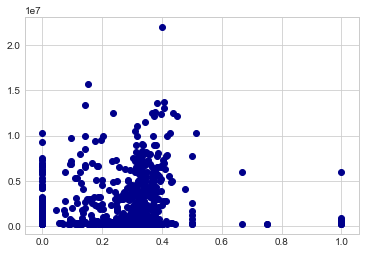

In [73]:
avail_players = combo[combo['yearID']==2001]
plt.scatter(x=avail_players['OBP'],y=avail_players['salary'],c='darkblue')

In [74]:
avail_players = avail_players[(avail_players['salary']<8000000) & (avail_players['OBP']>0)]
avail_players = avail_players[avail_players['AB'] >= 500]

In [75]:
possible = avail_players.sort_values(by='OBP', axis=0, ascending=False)
possible = possible.head(10)[['playerID','OBP','AB','salary']]
possible.transpose()

,7586,9400,1756,7939,21858,336,6063,7650,17844,16187
playerID,giambja01,heltoto01,berkmla01,gonzalu01,thomeji01,alomaro01,edmonji01,gilesbr02,pujolal01,olerujo01
OBP,0.4769,0.431655,0.430233,0.428571,0.416149,0.414671,0.410214,0.403561,0.402963,0.40118
AB,520,587,577,609,526,575,500,576,590,572
salary,4103333,4950000,305000,4833333,7875000,7750000,6333333,7333333,200000,6700000


In [76]:
possible[1:4]

,playerID,OBP,AB,salary
9400,heltoto01,0.431655,587.0,4950000
1756,berkmla01,0.430233,577.0,305000
7939,gonzalu01,0.428571,609.0,4833333
